In [1]:
import rootutils
import random
import numpy as np
from torchvision.transforms import Compose
import matplotlib.pyplot as plt
import cv2
path = '/idiap/temp/pvuillecard/projects/gaze_pretrain/'
rootutils.setup_root(path, indicator=".project-root", pythonpath=True)


PosixPath('/remote/idiap.svm/temp.perception01/pvuillecard/projects/gaze_pretrain')

In [2]:
from gaze_module.data.components.gaze_dataset import Gaze360Image, GFIEImage, MPSGazeImage
from gaze_module.data.components.transforms import (BboxRandomJitter,BboxReshape,Crop,
                                  ToTensor, Normalize,CropRandomResize,
                                  ToImage, HorizontalFlip)
from gaze_module.data.combined_datamodule import ConcatenateDataModule

%load_ext autoreload
%autoreload 2

In [3]:
transorm_simple = Compose([    
                        BboxReshape( square = True, ratio = 0.1),
                        BboxRandomJitter( jitter_ratio = 0.1),
                        ToImage(),
                        #Crop(224),
                        CropRandomResize(224),
                        HorizontalFlip(),
                        #ToTensor(),
                        # Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                    ])

dataset = Gaze360Image(
    data_location=None,
    image_db_path='/idiap/temp/pvuillecard/projects/face_analyser/datasets/Gaze360/gaze360_image_database.pkl',
    sample_path='/idiap/temp/pvuillecard/projects/face_analyser/datasets/Gaze360/samples/image_samples.csv',
    split='train',
    head_bbox_name='head_bbox_yolo',
    transform=transorm_simple,
)


In [5]:
def draw_arrow(img, yaw_pitch, d, color, thickness_float=0.01):
    w = img.shape[1]
    h = img.shape[0]

    pos = [w // 2, h // 2]
    length = w * d
    thickness = max(int(w * thickness_float), 1)
    # dx = -length * np.sin(pitch_yaw[1]) * np.cos(pitch_yaw[0])
    # dy = -length * np.sin(pitch_yaw[0])
    dx = -length * np.sin(yaw_pitch[0]) * np.cos(yaw_pitch[1])
    dy = -length * np.sin(yaw_pitch[1])

    cv2.arrowedLine(
        img,
        tuple(np.round(pos).astype(np.int32)),
        tuple(np.round([pos[0] + dx, pos[1] + dy]).astype(int)),
        color,
        thickness,
        cv2.LINE_AA,
        tipLength=0.2,
    )
    return img

yaw pitch tensor([-115.5419,  -45.2733])


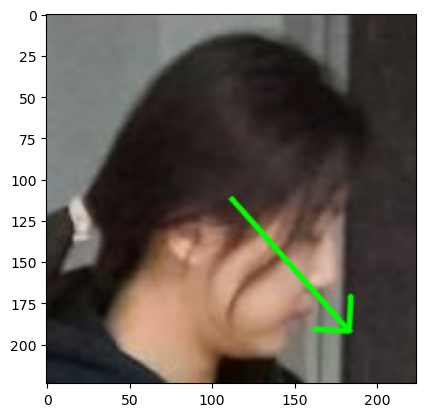

In [18]:
sample = dataset[np.random.randint(len(dataset))]
# plot the image 
#print(sample)
image = sample['images'][0].permute(1, 2, 0).numpy()
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image = draw_arrow(image, sample['task_gaze'], 0.5, (0, 255, 0))
print('yaw pitch',sample['task_gaze']*180/np.pi)
plt.imshow(image)


In [12]:
transorm_simple = Compose([    
                        BboxReshape( square = True, ratio = 0.1),
                        #BboxRandomJitter( jitter_ratio = 0.1),
                        ToImage(),
                        Crop(224),
                        #CropRandomResize(224),
                        #HorizontalFlip(),
                        #ToTensor(),
                        # Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                    ])

dataset = GFIEImage(
    data_location=None,
    image_db_path='/idiap/temp/pvuillecard/projects/face_analyser/datasets/GFIE/gfie_image_database.pkl',
    sample_path='/idiap/temp/pvuillecard/projects/face_analyser/datasets/GFIE/sample/samples.csv',
    split='validation',
    head_bbox_name=None,
    transform=transorm_simple,
)

yaw pitch tensor([-30.1870, -58.4263])


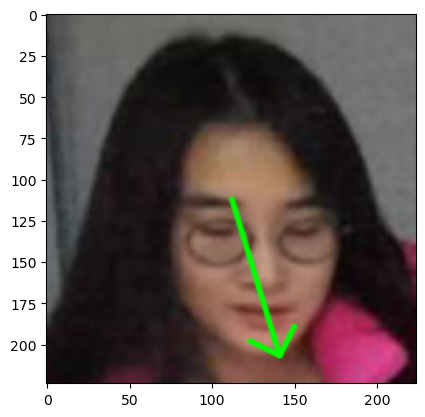

In [16]:
sample = dataset[np.random.randint(len(dataset))]
# plot the image 
#print(sample)
image = sample['images'][0].permute(1, 2, 0).numpy()
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image = draw_arrow(image, sample['task_gaze'], 0.5, (0, 255, 0))
print('yaw pitch',sample['task_gaze']*180/np.pi)
plt.imshow(image)

In [66]:
transorm_simple = Compose([    
                        BboxReshape( square = True, ratio = 0.1),
                        #BboxRandomJitter( jitter_ratio = 0.1),
                        ToImage(),
                        Crop(224),
                        #CropRandomResize(224),
                        #HorizontalFlip(),
                        #ToTensor(),
                        # Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                    ])

dataset_mps = MPSGazeImage(
    data_location=None,
    image_db_path='/idiap/temp/pvuillecard/projects/face_analyser/datasets/MPSGaze/mpsgaze_image_database.pkl',
    sample_path='/idiap/temp/pvuillecard/projects/face_analyser/datasets/MPSGaze/mpsgaze_file.csv',
    split='train',
    head_bbox_name=None,
    transform=transorm_simple,
)

In [67]:
len(dataset_mps)

24282

yaw pitch tensor([  8.2506, -59.2381])


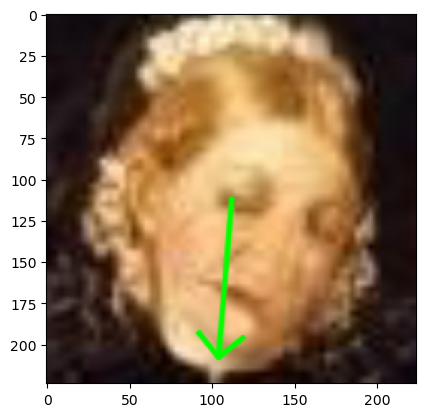

In [63]:
sample = dataset_mps[np.random.randint(len(dataset_mps))]
# plot the image 
#print(sample)
image = sample['images'][0].permute(1, 2, 0).numpy()
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image = draw_arrow(image, sample['task_gaze'], 0.5, (0, 255, 0))
print('yaw pitch',sample['task_gaze']*180/np.pi)
plt.imshow(image)

In [3]:

from functools import partial 


In [12]:

transorm_simple = Compose([    
                        BboxReshape( square = True, ratio = 0.1),
                        BboxRandomJitter( jitter_ratio = 0.1),
                        ToImage(),
                        #Crop(224),
                        CropRandomResize(224),
                        HorizontalFlip(),
                        ToTensor(),
                        # Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                    ])

dataset_gaze360 = partial(Gaze360Image,
    data_location=None,
    image_db_path='/idiap/temp/pvuillecard/projects/face_analyser/datasets/Gaze360/gaze360_image_database.pkl',
    sample_path='/idiap/temp/pvuillecard/projects/face_analyser/datasets/Gaze360/samples/image_samples.csv',
    head_bbox_name='head_bbox_yolo',
)

dataset_gfie = partial(GFIEImage,
    data_location=None,
    image_db_path='/idiap/temp/pvuillecard/projects/face_analyser/datasets/GFIE/gfie_image_database.pkl',
    sample_path='/idiap/temp/pvuillecard/projects/face_analyser/datasets/GFIE/sample/samples.csv',
    head_bbox_name=None,
)




In [13]:
dataset = ConcatenateDataModule(
    datasets = [dataset_gaze360, dataset_gfie],
    train_transform = transorm_simple,
    test_transform= transorm_simple,
    batch_size = 2,
    num_workers = 2,
)
dataset.setup()

In [50]:
train_loader = dataset.train_dataloader()
val_loader = dataset.val_dataloader()
test_loader = dataset.test_dataloader()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0
1


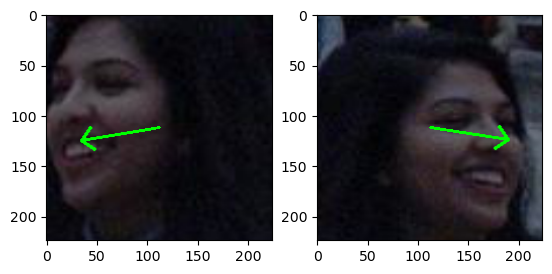

In [74]:
for batch in val_loader:
    
    images = batch['images']
    fig,ax = plt.subplots(1,2)
    for i in range(len(ax)):
        print(i)
        image = images[i][0].permute(1, 2, 0).numpy()
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        image = draw_arrow(image, batch['task_gaze'][i], 0.5, (0, 255, 0))
        ax[i].imshow(image)
    
    plt.imshow(image)
    break

In [9]:
import math
def warm_start_and_cosine_annealing(epoch):
    if epoch < 5:
        lr = (epoch+1) / 5
    else:
        lr = 0.5 * (1. + math.cos(math.pi * ((epoch+1) - 5) / (20 - 5 )))
    return lr

In [10]:
print([ warm_start_and_cosine_annealing(i) for i in range(20)])

[0.2, 0.4, 0.6, 0.8, 1.0, 0.9890738003669028, 0.9567727288213004, 0.9045084971874737, 0.8345653031794291, 0.75, 0.6545084971874737, 0.5522642316338268, 0.44773576836617335, 0.34549150281252633, 0.2500000000000001, 0.16543469682057105, 0.09549150281252633, 0.04322727117869951, 0.010926199633097156, 0.0]
